HTTP Status: 200


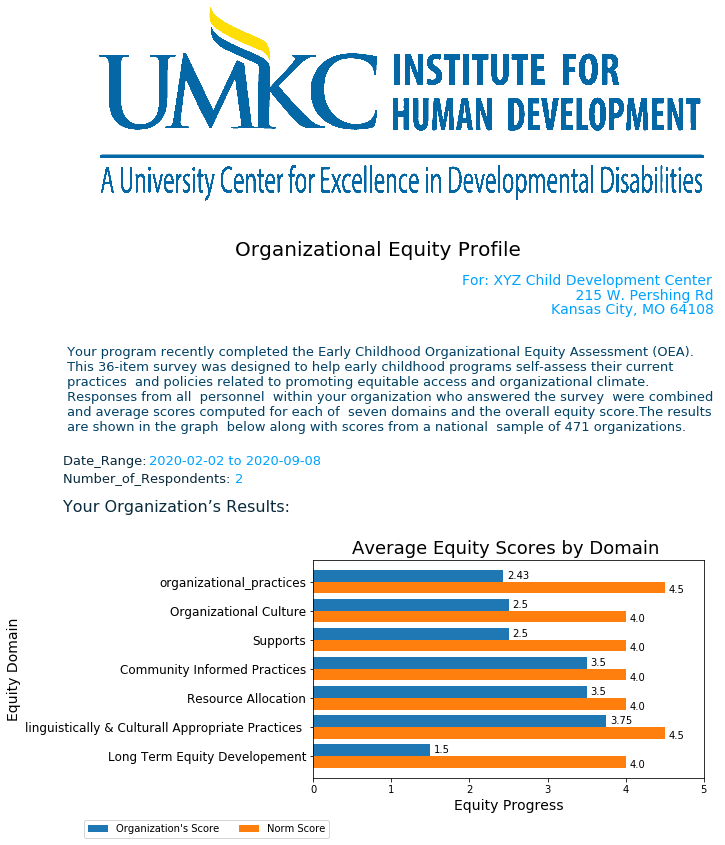

In [8]:
#!/usr/bin/env python
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from io import StringIO

data = {
    'token': '275E68BE933632E7DB94F61D444F6B11',
    'content': 'report',
    'format': 'csv',
    'report_id': '2072',
    'csvDelimiter': '',
    'rawOrLabel': 'raw',
    'rawOrLabelHeaders': 'raw',
    'exportCheckboxLabel': 'false',
    'returnFormat': 'json'
}
r = requests.post('https://redcap.umkc.edu/api/', data=data)
print('HTTP Status: ' + str(r.status_code))
# print(r.text)
reportdata = pd.read_csv(StringIO(r.text))

# get start and end date from html inputs
start_date = pd.to_datetime("02/02/2020")
end_date = pd.to_datetime("09/08/2020")
# start_date = pd.to_datetime(input("Please enter Start date(mm/dd/yyyy) "))
# end_date = pd.to_datetime(input("Please enter End Date(mm/dd/yyyy)"))

mask = (pd.to_datetime(reportdata['today_s_date']) >= start_date) & (
            pd.to_datetime(reportdata['today_s_date']) <= end_date)
reportdata = reportdata.loc[mask]

Number_of_Respondents = str(reportdata.shape[0])
Date_Range = str(start_date.date()) + " to " + str(end_date.date())

meanofall = list(reportdata.iloc[:, 2:].mean(axis=0))
meanofall = list([round(x, 2) for x in meanofall])
meannorm = list([4.50, 4.00, 4.00, 4.00, 4.00, 4.50, 4.00])

columns = ['organizational_practices', 'Organizational Culture', 'Supports', 'Community Informed Practices',
           'Resource Allocation',
           'linguistically & Culturall Appropriate Practices ', 'Long Term Equity Developement']
ypos = np.arange(len(columns))
xpos = np.arange(6)
score_label = np.arange(0, 100, 10)
bar_width = 0.4
fig, ax = plt.subplots()
domainbar = ax.barh(ypos, meanofall, bar_width, label="Organization's Score")
normbar = ax.barh((ypos)+bar_width, meannorm, bar_width, label="Norm Score")

ax.set_yticks(ypos+.20)
ax.set_xticks(xpos)

ax.set_yticklabels(columns,fontsize=12)
ax.invert_yaxis()
ax.set_xlabel('Equity Progress',fontsize=14)
ax.set_ylabel('Equity Domain',fontsize=14)
ax.set_title("Average Equity Scores by Domain ",fontsize=18)
ax.legend(bbox_to_anchor=(-.6, -.3),loc="lower left", ncol=len(columns))
fig = plt.gcf()
fig.set_size_inches(7, 4)
# plt.figtext(5, 7, "xyzzzz")
#ax.text(5.2, .4, Date_Range)
#ax.text(5.2, .8, Number_of_Respondents)


        
ax.text(-1,-11,"Organizational Equity Profile",fontsize=20)
ax.text(1.9,-10,"For: XYZ Child Development Center",fontsize=14 ,color = '#00a2ff')
ax.text(3.3,-9.5," 215 W. Pershing Rd ",fontsize=14,color = '#00a2ff') 
ax.text(3.05,-9.0,"Kansas City, MO 64108",fontsize=14,color = '#00a2ff')
para =" Your program recently completed the Early Childhood Organizational Equity Assessment (OEA). \n This 36-item survey was designed to help early childhood programs self-assess their current \n practices  and policies related to promoting equitable access and organizational climate. \n Responses from all  personnel  within your organization who answered the survey  were combined \n and average scores computed for each of  seven domains and the overall equity score.The results \n are shown in the graph  below along with scores from a national  sample of 471 organizations."
ax.text(-3.2,-5,para,fontsize=13,color='#014166')
ax.text(-3.2,-2.2,"Your Organization’s Results:",fontsize=16,color='#0a2b3d')
ax.text(-3.2, -3.8, "Date_Range: ",fontsize=13,color='#0a2b3d')
ax.text(-2.1, -3.8, Date_Range,fontsize=13,color='#00a2ff')

ax.text(-3.2, -3.2, "Number_of_Respondents: ",fontsize=13,color='#0a2b3d')
ax.text(-1, -3.2, Number_of_Respondents,fontsize=13,color='#00a2ff')        
        


for y, x in enumerate(meanofall):
    ax.annotate(x, xy=(x + 0.05, y+.1))

for y, x in enumerate(meannorm):
    ax.annotate(x, xy=(x + .05, y+.60))
    
    
#logos:

from matplotlib.cbook import get_sample_data

logoheader = plt.imread("https://www.modhc.org/wp-content/uploads/ihd-logo-color.png")
footer = plt.imread(get_sample_data(r'C:\Users\ahame\OneDrive\Desktop\automation Project\footer.jpg'))


#fig, ax = plt.subplots()
#ax.plot(range(10))

# Place the image in the upper-right corner of the figure
#--------------------------------------------------------
# We're specifying the position and size in _figure_ coordinates, so the image
# will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# image in front of the axes.
newax = fig.add_axes([-.3, .9, 1.2, 1.9], anchor='NE')
#newax = fig.add_axes([.4, .8, 1.4, 1.58], anchor='NE')
newax.imshow(logoheader)
newax.axis('off')

# newaxfoot = fig.add_axes([-.4, -1.8, 2.4, 1.58], anchor='NE')
# #newax = fig.add_axes([.4, .8, .4, 1.58], anchor='NE')
# newaxfoot.imshow(footer)
# newaxfoot.axis('off')

#fig.savefig(r'C:\Users\ahame\OneDrive\Desktop\automation Project\report_final1.pdf', dpi=100,bbox_inches='tight')
plt.show()